## IBM data science certificate 

### _Capstone Project: Relocation to Dublin, Tri-valley to ramp up your business_
1. _Web Scraping to get the neighborhood of Dublin and average housing sales data from 680homes.com._
2. _Get the geographical coordinates of the neighborhoods._
3. _Obtain the venue data for each neighborhoods from Foursquare API._
4. _Select venue categories and classify them into 2 features: convenience and productivity._
5. _Apply descriptive modeling and machine learning clustering._
6. _Analyze and recommend the best cluster of neighborhood_


### Import Libraries

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files
#!pip install geopy
from geopy.geocoders import Nominatim ### convert an address into latitude & longitude values
#!pip install geocoder
import geocoder
import requests # library to handle request
from bs4 import BeautifulSoup # library to parse HTML and XML documents

from pandas.io.json import json_normalize  # transform JSON file into a pandas dataframe

#matplotlib library
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes
import folium # map rendering library

print('libraries imported')

libraries imported


In [2]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors

### 1. Web Scraping to get the neighborhood of Dublin and average housing sales data

#### let's get the coordinates of Dublin, CA

In [3]:
address='Dublin, CA'
geolocator=Nominatim(user_agent='dublin_explorer')
location=geolocator.geocode(address)
latitude=location.latitude
longitude=location.longitude
print('The geographical coordinate of Dublin, CA are {},{}'.format(latitude,longitude))

The geographical coordinate of Dublin, CA are 37.7021521,-121.9357918


#### let's look into the neighborhood data from nextdoor.com & https://www.680homes.com

In [4]:
#@hide 
url='https://nextdoor.com/city/dublin--ca/'
dublin_results=requests.get(url).text
soup=BeautifulSoup(dublin_results,'lxml')
soup.find_all('div')

[<div id="address_entry">
 <div class="background us splash-background-container" id="sign_up_top_section">
 <div class="js-splash-background-top-image splash-background-top-image"></div>
 <div class="js-splash-background-top-image splash-background-top-image"></div>
 <div class="container " id="global_nav_container">
 <div class="hide" id="placesTarget"></div>
 <div class="navbar navbar-fixed-top navbar-inverse seo-navbar" role="menubar">
 <div class="navbar-inner shadow">
 <div class="container seo-nav-container">
 <div class="top-nav">
 <div class="primary-nav">
 <div class="brand">
 <a href="/" title="Nextdoor">
 <div class="nd-logo seo-nav-nd-logo"><i>Nextdoor</i></div>
 </a>
 </div>
 </div>
 <div class="logged-out-header">
 <a href="/about_us/">About</a>
 <a class="hidden-phone" data-utm-tracking="true" href="/login/">Sign in</a>
 <a data-utm-tracking="true" href="/">Sign up</a>
 </div>
 </div>
 </div>
 </div>
 <div class="breadcrumb-container">
 <div class="container seo-breadcr

In [4]:
url='https://www.680homes.com/Search-By-Neighborhood/Dublin/'
dublin_results1=requests.get(url).text
soup=BeautifulSoup(dublin_results1,'lxml')
soup

<!DOCTYPE html>
<html lang="en" xmlns="http://www.w3.org/1999/xhtml">
<head>
<title>Homes for Sale by Neighborhood in Dublin CA</title>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1.0, maximum-scale=1.0, user-scalable=0" name="viewport"/>
<meta content="yes" name="apple-mobile-web-app-capable"/>
<meta content="black" name="apple-mobile-web-app-status-bar-style"/>
<meta content="black-translucent" name="apple-mobile-web-app-status-bar-style"/>
<meta content="telephone=no" name="format-detection"/>
<meta content="Call Doug Buenz &amp; The 680 Group at (925) 621-0680 today! Explore the neighborhoods of Dublin CA, search for real estate and available homes for sale in Dublin, including market statistics, detailed neighborhood information, designated schools, and HOA information." name="description"/>
<meta content="Homes for Sale in Dublin CA, Homes for Sale in the Dublin Neighborhood, Dublin CA Real Estate

In [5]:
neighbor_list=soup.find_all('div',class_='neigh-name-list')
avgprice_list=soup.find_all('div',class_='neigh-name-avgprice')
print(len(neighbor_list))
print(len(avgprice_list))

29
29


In [6]:
neighborlist=[]
for row in neighbor_list:
    neighborlist.append(row.text.strip())
neighborlist

['Briar Hills',
 'California Creekside',
 'Dublin Hills Estates',
 'Echo Park',
 'Emerald Vista',
 'Ponderosa Village',
 'Riva & Rainsong',
 'San Ramon Village',
 'Silvergate Area',
 'Tassajara Meadows',
 'Willow Creek',
 'Boulevard',
 'Dublin Greene',
 'Dublin Ranch Area',
 'Emerald Park',
 'Fallon Crossing Area',
 'Foothill Estates',
 'Irongate',
 'Jordan Ranch',
 'Sorrento',
 'Wallis Ranch',
 'Bordeaux Estates & Images',
 'Dublin Ranch Golf Club',
 'Hansen Hill & Hacienda Heights',
 'Pinnacle Ridge',
 'Positano',
 'Schaefer Ranch',
 'Tassajara Hills',
 'Veneto & The Heights at Positano']

In [7]:
pricelist=[]
for row in avgprice_list:
    pricelist.append(row.text.strip())
pricelist

['Average Sales Price :  $1,033,941',
 'Average Sales Price :  $1,069,200',
 'Average Sales Price :  $938,181',
 'Average Sales Price :  $855,219',
 'Average Sales Price :  $880,500',
 'Average Sales Price :  $960,455',
 'Average Sales Price :  $1,021,929',
 'Average Sales Price :  $855,284',
 'Average Sales Price :  $1,001,864',
 'Average Sales Price :  $1,034,313',
 'Average Sales Price :  $1,043,500',
 'Average Sales Price :  $1,058,512',
 'Average Sales Price :  $1,230,000',
 'Average Sales Price :  $1,298,442',
 'Average Sales Price :  $1,204,850',
 'Average Sales Price :  $1,229,518',
 'Average Sales Price :  $1,076,833',
 'Average Sales Price :  $1,097,846',
 'Average Sales Price :  $1,174,455',
 'Average Sales Price :  $1,059,714',
 'Average Sales Price :  $1,205,833',
 'Average Sales Price :  $1,298,651',
 'Average Sales Price :  $1,610,200',
 'Average Sales Price :  $1,424,600',
 'Average Sales Price :  $2,121,750',
 'Average Sales Price :  $1,459,027',
 'Average Sales Price 

In [8]:
pricelist[1][24:]

'1,069,200'

In [11]:
# soup.find_all('div',class_='column')[0]

<div class="column">
<div class="hood_group">
<p class="title">A</p>
<p><a href="https://nextdoor.com/neighborhood/arivare--dublin--ca/">Arivare</a></p>
<p><a href="https://nextdoor.com/neighborhood/arrivare--dublin--ca/">Arrivare</a></p>
</div>
<div class="hood_group">
<p class="title">C</p>
<p><a href="https://nextdoor.com/neighborhood/californiahighlands--dublin--ca/">California Highlands</a></p>
<p><a href="https://nextdoor.com/neighborhood/connollystation--dublin--ca/">Connolly Station</a></p>
</div>
<div class="hood_group">
<p class="title">D</p>
<p><a href="https://nextdoor.com/neighborhood/dublinranch--dublin--ca/">Dublin Ranch</a></p>
</div>
<div class="hood_group">
<p class="title">E</p>
<p><a href="https://nextdoor.com/neighborhood/echoparkdublin--dublin--ca/">Echo Park</a></p>
</div>
</div>

In [32]:
#scrape_list=[]
#for i in range(len(soup.find_all('div',class_='hood_group'))):
#    scrape_list.append(soup.find_all('div',class_='hood_group')[i].findAll('p')[1:])
#scrape_list

[[<p><a href="https://nextdoor.com/neighborhood/arivare--dublin--ca/">Arivare</a></p>,
  <p><a href="https://nextdoor.com/neighborhood/arrivare--dublin--ca/">Arrivare</a></p>],
 [<p><a href="https://nextdoor.com/neighborhood/californiahighlands--dublin--ca/">California Highlands</a></p>,
  <p><a href="https://nextdoor.com/neighborhood/connollystation--dublin--ca/">Connolly Station</a></p>],
 [<p><a href="https://nextdoor.com/neighborhood/dublinranch--dublin--ca/">Dublin Ranch</a></p>],
 [<p><a href="https://nextdoor.com/neighborhood/echoparkdublin--dublin--ca/">Echo Park</a></p>],
 [<p><a href="https://nextdoor.com/neighborhood/hansenranch--dublin--ca/">Hansen Ranch</a></p>,
  <p><a href="https://nextdoor.com/neighborhood/hillbrookbarnet--dublin--ca/">Hillbrook - Barnet</a></p>],
 [<p><a href="https://nextdoor.com/neighborhood/jordanranch--dublin--ca/">Jordan Ranch</a></p>],
 [<p><a href="https://nextdoor.com/neighborhood/longfordway--dublin--ca/">Longford Way</a></p>],
 [<p><a href="h

In [12]:
## function to flat a nested list with multiple levels of nesting 
## cannot quite understand

def removeNestings(l):

    for i in l:
        if type(i)==list:
            removeNestings(i)
        else:
            output.append(i)
    return output

In [43]:
neighborlist=[]
for row in new_list:
    neighborlist.append(row.text)
neighborlist

['Arivare',
 'Arrivare',
 'California Highlands',
 'Connolly Station',
 'Dublin Ranch',
 'Echo Park',
 'Hansen Ranch',
 'Hillbrook - Barnet',
 'Jordan Ranch',
 'Longford Way',
 'Piazza',
 'Positano',
 'Schaefer Ranch',
 'Tassajara Hills',
 'The Preserve',
 'Tralee',
 'Village/Dublin',
 'Village Pkwy',
 'Wallis Ranch',
 'West Dublin']

### 2. Get the geographical coordinates of the neighborhoods.

In [9]:
# define a function to get coordinates
def get_coords(neighborhood):
    # initialize your variable to None
    lat_lng_coords=None
    #loop until you get the coordinates
    while(lat_lng_coords is None):
        g=geocoder.arcgis('{}, Dublin,CA'.format(neighborhood))
        lat_lng_coords=g.latlng
    return lat_lng_coords

In [10]:
dublin_coords=[get_coords(neighborhood) for neighborhood in neighborlist]
print(len(dublin_coords))
dublin_coords

29


[[37.723025509564586, -121.92976527643334],
 [36.610520000000065, -121.69299999999998],
 [43.51679000000007, -81.28304999999995],
 [34.07609000000008, -118.25580999999994],
 [37.713075144417, -121.92497533424324],
 [32.586473085608546, -82.86168353147823],
 [37.70423000000005, -121.91634999999997],
 [37.721580000000074, -121.92864999999995],
 [37.70724074815049, -121.9464746523802],
 [37.73092997907852, -121.87100180575341],
 [37.72527107252977, -121.9107872073115],
 [37.70556689919004, -121.87497577993891],
 [37.710675, -121.94034299999998],
 [37.71699815934966, -121.86834183008371],
 [37.713075144417, -121.92497533424324],
 [37.70267234710622, -121.85047725387362],
 [34.633320000000026, -120.48238999999995],
 [37.70423000000005, -121.91634999999997],
 [37.713486706564254, -121.84724514671788],
 [53.26691183426653, -6.224202866611063],
 [37.73385550938425, -121.87405999431675],
 [36.86127300000001, -119.72917799999999],
 [37.72551994445754, -121.85716008050079],
 [33.99413000000004, -

In [11]:
# create dataframe to populate the coordinates into latitude and longitude
df_coords=pd.DataFrame(dublin_coords,columns=['Latitude','Longitude'])
df_coords['Neighborhood']=neighborlist
df_coords=df_coords[['Neighborhood','Latitude','Longitude']]
df_coords

,Neighborhood,Latitude,Longitude
0,Briar Hills,37.723026,-121.929765
1,California Creekside,36.610520,-121.693000
2,Dublin Hills Estates,43.516790,-81.283050
3,Echo Park,34.076090,-118.255810
4,Emerald Vista,37.713075,-121.924975
5,Ponderosa Village,32.586473,-82.861684
6,Riva & Rainsong,37.704230,-121.916350
7,San Ramon Village,37.721580,-121.928650
8,Silvergate Area,37.707241,-121.946475
9,Tassajara Meadows,37.730930,-121.871002


In [12]:
df_coords['AvgPrice']=pricelist
df_coords.head()

,Neighborhood,Latitude,Longitude,AvgPrice
0,Briar Hills,37.723026,-121.929765,"Average Sales Price : $1,033,941"
1,California Creekside,36.610520,-121.693000,"Average Sales Price : $1,069,200"
2,Dublin Hills Estates,43.516790,-81.283050,"Average Sales Price : $938,181"
3,Echo Park,34.076090,-118.255810,"Average Sales Price : $855,219"
4,Emerald Vista,37.713075,-121.924975,"Average Sales Price : $880,500"


In [13]:
price=[float(i[24:].replace(',','')) for i in df_coords.AvgPrice]
df_coords['Price']=price
df_coords.drop('AvgPrice',axis=1,inplace=True)
df_coords.head(10)

,Neighborhood,Latitude,Longitude,Price
0,Briar Hills,37.723026,-121.929765,1033941.0
1,California Creekside,36.610520,-121.693000,1069200.0
2,Dublin Hills Estates,43.516790,-81.283050,938181.0
3,Echo Park,34.076090,-118.255810,855219.0
4,Emerald Vista,37.713075,-121.924975,880500.0
5,Ponderosa Village,32.586473,-82.861684,960455.0
6,Riva & Rainsong,37.704230,-121.916350,1021929.0
7,San Ramon Village,37.721580,-121.928650,855284.0
8,Silvergate Area,37.707241,-121.946475,1001864.0
9,Tassajara Meadows,37.730930,-121.871002,1034313.0


In [14]:

#remove Dublin, OH and Dublin, Ireland
df_coords=df_coords[(df_coords['Longitude']<=-121) & (df_coords['Longitude']>=-122) &(df_coords['Latitude']>=37)&(df_coords['Latitude']<=38)].reset_index(drop=True)

df_coords

,Neighborhood,Latitude,Longitude,Price
0,Briar Hills,37.723026,-121.929765,1033941.0
1,Emerald Vista,37.713075,-121.924975,880500.0
2,Riva & Rainsong,37.704230,-121.916350,1021929.0
3,San Ramon Village,37.721580,-121.928650,855284.0
4,Silvergate Area,37.707241,-121.946475,1001864.0
5,Tassajara Meadows,37.730930,-121.871002,1034313.0
6,Willow Creek,37.725271,-121.910787,1043500.0
7,Boulevard,37.705567,-121.874976,1058512.0
8,Dublin Greene,37.710675,-121.940343,1230000.0
9,Dublin Ranch Area,37.716998,-121.868342,1298442.0


Text(0.5, 1.0, 'Average Sales Price within Dublin neighborhood')

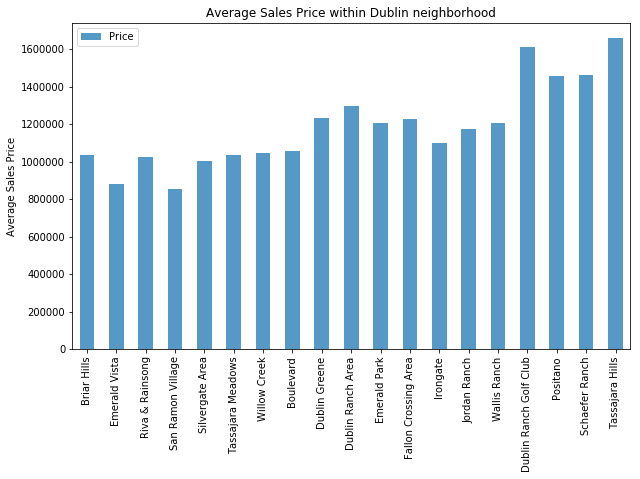

In [15]:
price_df=df_coords.set_index(['Neighborhood']).iloc[:,[2]]
price_df.plot(kind='bar', figsize=(10,6),alpha=0.75)
plt.xlabel('')
plt.ylabel('Average Sales Price')
plt.title('Average Sales Price within Dublin neighborhood')

#### create a map of Dublin with all neighborhoods superimposed on top

In [16]:
# get the coordinates of Dublin
address='Dublin, CA'
geolocator=Nominatim(user_agent='dublin_explorer')
location=geolocator.geocode(address)
latitude=location.latitude
longitude=location.longitude
print('The geographical coordinate of Dublin, CA are {},{}'.format(latitude,longitude))

The geographical coordinate of Dublin, CA are 37.7021521,-121.9357918


In [17]:
# create map of Dublin using latitude and longitude values
map_dublin=folium.Map(location=[latitude,longitude],zoom_start=12)

#add markers to map
for lat, lng, neighborhood in zip(df_coords['Latitude'], df_coords['Longitude'], df_coords['Neighborhood']):
    label='{}'.format(neighborhood)
    label=folium.Popup(label,parse_html=True)
    folium.CircleMarker(
        [lat,lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7
    ).add_to(map_dublin)

map_dublin

### 3. Obtain the venue data for each neighborhoods from Foursquare API

In [25]:
# define Foursquare Credentials and Version
CLIENT_ID = 'your Foursquare ID' # your Foursquare ID
CLIENT_SECRET = 'your Foursquare Secret' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: your Foursquare ID
CLIENT_SECRET:your Foursquare Secret


In [18]:
 # @hidden_cell

CLIENT_ID = 'GQGROWFIHLRKKB2RI15T00PYM4P0K25V3AL3D0O0GLPZLJVZ' # your Foursquare ID
CLIENT_SECRET = '5N0GX3GTBXP10BHF4ZOR2O4ANJWZS1J0H5VFDZKHJVXPMMDM' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: GQGROWFIHLRKKB2RI15T00PYM4P0K25V3AL3D0O0GLPZLJVZ
CLIENT_SECRET:5N0GX3GTBXP10BHF4ZOR2O4ANJWZS1J0H5VFDZKHJVXPMMDM


####  I will test to get 100 venues in my neighborhood (Arivare)

In [19]:
LIMIT=100
radius=1500

 # create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    df_coords.loc[5,'Latitude'], 
    df_coords.loc[5,'Longitude'], 
    radius, 
    LIMIT)
url # display UR

'https://api.foursquare.com/v2/venues/explore?&client_id=GQGROWFIHLRKKB2RI15T00PYM4P0K25V3AL3D0O0GLPZLJVZ&client_secret=5N0GX3GTBXP10BHF4ZOR2O4ANJWZS1J0H5VFDZKHJVXPMMDM&v=20180605&ll=37.73092997907852,-121.87100180575341&radius=1500&limit=100'

In [20]:
# send the GET request and examine the results
results=requests.get(url).json()
print(len(results))
nearby_venues=json_normalize(results['response']['groups'][0]['items'])
nearby_venues.head(10)

2


,reasons.count,reasons.items,referralId,venue.categories,venue.id,venue.location.address,venue.location.cc,venue.location.city,venue.location.country,venue.location.distance,venue.location.formattedAddress,venue.location.labeledLatLngs,venue.location.lat,venue.location.lng,venue.location.postalCode,venue.location.state,venue.name,venue.photos.count,venue.photos.groups
0,0,"[{'summary': 'This spot is popular', 'type': '...",e-0-49ce90b3f964a5205b5a1fe3-0,"[{'id': '4bf58dd8d48988d1e6941735', 'name': 'G...",49ce90b3f964a5205b5a1fe3,5900 Signal Hill Dr,US,Dublin,United States,1356,"[5900 Signal Hill Dr, Dublin, CA 94568, United...","[{'label': 'display', 'lat': 37.72503754678855...",37.725038,-121.857521,94568,CA,Dublin Ranch Golf Club,0,[]
1,0,"[{'summary': 'This spot is popular', 'type': '...",e-0-589e5f3e110d0313493ec7af-1,"[{'id': '52e81612bcbc57f1066b7a26', 'name': 'R...",589e5f3e110d0313493ec7af,NaN,US,Dublin,United States,680,"[Dublin, CA, United States]","[{'label': 'display', 'lat': 37.73595515095812...",37.735955,-121.875399,NaN,CA,Kindred House,0,[]
2,0,"[{'summary': 'This spot is popular', 'type': '...",e-0-55bb02ed498ec11f6538e303-2,"[{'id': '5453de49498eade8af355881', 'name': 'B...",55bb02ed498ec11f6538e303,5598 Crestridge Ter,US,Dublin,United States,1305,"[5598 Crestridge Ter, Dublin, CA 94568, United...","[{'label': 'display', 'lat': 37.71926926474386...",37.719269,-121.869385,94568,CA,"ERPE, Inc",0,[]
3,0,"[{'summary': 'This spot is popular', 'type': '...",e-0-4ce87564948f224bd1b0f05d-3,"[{'id': '4bf58dd8d48988d102941735', 'name': 'Y...",4ce87564948f224bd1b0f05d,NaN,US,San Ramon,United States,1360,"[San Ramon, CA 94583, United States]","[{'label': 'display', 'lat': 37.72319470520862...",37.723195,-121.882969,94583,CA,The Yoga Company,0,[]
4,0,"[{'summary': 'This spot is popular', 'type': '...",e-0-51c7a4cc498e0d1da3b71da9-4,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",51c7a4cc498e0d1da3b71da9,NaN,US,Dublin,United States,1404,"[Dublin, CA, United States]","[{'label': 'display', 'lat': 37.7251316200648,...",37.725132,-121.856836,NaN,CA,Dublin Ranch Golf Course Restaurant And Bar,0,[]
5,0,"[{'summary': 'This spot is popular', 'type': '...",e-0-4b64cd91f964a52055d12ae3-5,"[{'id': '4bf58dd8d48988d163941735', 'name': 'P...",4b64cd91f964a52055d12ae3,NaN,US,Dublin,United States,1484,"[Dublin, CA 94568, United States]","[{'label': 'display', 'lat': 37.71874270559494...",37.718743,-121.864158,94568,CA,Ted Fairfield Park,0,[]


In [29]:
print('{} venues were retured by Foursquare'.format(nearby_venues.shape[0]))

4 venues were retured by Foursquare


In [21]:
def get_category_type(row):
    try:
        categories_list=row['categories']
    except:
        categories_list=row['venue.categories']
    
    if len(categories_list)==0:
        return None
    else:
        return categories_list[0]['name']

In [22]:
venues=results['response']['groups'][0]['items']
nearby_venues=json_normalize(venues)

#filter columns
filtered_columns=['venue.name','venue.categories','venue.location.lat','venue.location.lng']
nearby_venues=nearby_venues.loc[:,filtered_columns]

#filter the category for each row 
nearby_venues['venue.categories']=nearby_venues.apply(get_category_type, axis=1)

nearby_venues

,venue.name,venue.categories,venue.location.lat,venue.location.lng
0,Dublin Ranch Golf Club,Golf Course,37.725038,-121.857521
1,Kindred House,Recreation Center,37.735955,-121.875399
2,"ERPE, Inc",Business Service,37.719269,-121.869385
3,The Yoga Company,Yoga Studio,37.723195,-121.882969
4,Dublin Ranch Golf Course Restaurant And Bar,Coffee Shop,37.725132,-121.856836
5,Ted Fairfield Park,Park,37.718743,-121.864158


In [23]:
nearby_venues.columns=[col.split('.')[-1] for col in nearby_venues.columns]
nearby_venues.head()

,name,categories,lat,lng
0,Dublin Ranch Golf Club,Golf Course,37.725038,-121.857521
1,Kindred House,Recreation Center,37.735955,-121.875399
2,"ERPE, Inc",Business Service,37.719269,-121.869385
3,The Yoga Company,Yoga Studio,37.723195,-121.882969
4,Dublin Ranch Golf Course Restaurant And Bar,Coffee Shop,37.725132,-121.856836


#### Start exploring all neighborhoods

In [24]:
## function to repeat the same process for all the neighborhoods in Dublin, CA
def getNearbyVenues(names, latitudes, longitudes, radius=1200):
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
        
        # create API results URL
        url='https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID,
            CLIENT_SECRET,
            VERSION,
            lat,
            lng,
            radius,
            LIMIT)
        
        # make GET request
        results=requests.get(url).json()['response']['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name,
            lat,
            lng,
            v['venue']['name'],v['venue']['location']['lat'],v['venue']['location']['lng'],
            v['venue']['categories'][0]['name']) for v in results])
    
    nearby_venues=pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns=['Neighborhood','Neighborhood Latitude','Neighborhood Longitude',
                           'Venue','Venue Latitude','Venue Longitude','Venue Category']
    return(nearby_venues)

In [25]:
dublin_venues = getNearbyVenues(names=df_coords['Neighborhood'],
                                   latitudes=df_coords['Latitude'],
                                   longitudes=df_coords['Longitude']
                                  )


Briar Hills
Emerald Vista
Riva & Rainsong
San Ramon Village
Silvergate Area
Tassajara Meadows
Willow Creek
Boulevard
Dublin Greene
Dublin Ranch Area
Emerald Park
Fallon Crossing Area
Irongate
Jordan Ranch
Wallis Ranch
Dublin Ranch Golf Club
Positano
Schaefer Ranch
Tassajara Hills


In [26]:
dublin_venues.shape

(835, 7)

In [27]:
print('There are {} unique categories'.format(len(dublin_venues['Venue Category'].unique())))

There are 163 unique categories


### 4. Select venue categories and classify them into 2 features: _Convenience & Productivity_

In [28]:
dublin_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Briar Hills,37.723026,-121.929765,7-Eleven,37.724801,-121.934445,Convenience Store
1,Briar Hills,37.723026,-121.929765,Kolb Park,37.718497,-121.928818,Park
2,Briar Hills,37.723026,-121.929765,Walmart Neighborhood Market,37.729481,-121.929481,Grocery Store
3,Briar Hills,37.723026,-121.929765,T4 Tea For You,37.730203,-121.929927,Bubble Tea Shop
4,Briar Hills,37.723026,-121.929765,Pizza Hut,37.728460,-121.930878,Pizza Place


In [29]:
venue_counts=dublin_venues.groupby('Neighborhood').count()
venue_counts

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Boulevard,100,100,100,100,100,100
Briar Hills,40,40,40,40,40,40
Dublin Greene,54,54,54,54,54,54
Dublin Ranch Area,28,28,28,28,28,28
Dublin Ranch Golf Club,5,5,5,5,5,5
Emerald Park,60,60,60,60,60,60
Emerald Vista,60,60,60,60,60,60
Fallon Crossing Area,100,100,100,100,100,100
Irongate,99,99,99,99,99,99


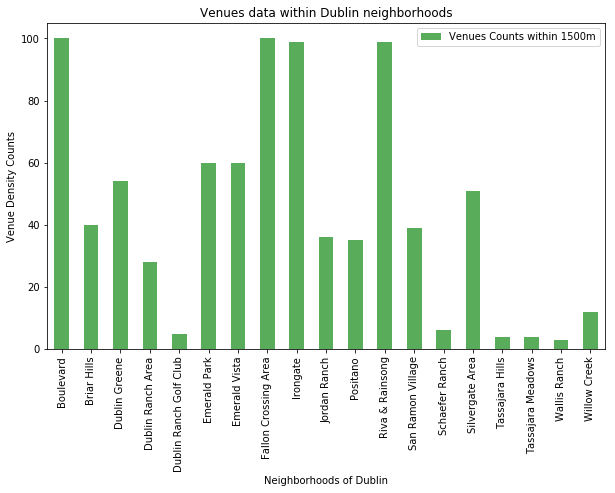

In [30]:
# step 2: plot data
venue_counts.iloc[:,2].plot(kind='bar', figsize=(10, 6), alpha=0.65, color='green')

plt.xlabel('Neighborhoods of Dublin') # add to x-label to the plot
plt.ylabel('Venue Density Counts') # add y-label to the plot
plt.title('Venues data within Dublin neighborhoods') # add title to the plot
plt.legend(['Venues Counts within 1500m'])
plt.show()

In [31]:
# one hot encoding
dublin_onehot=pd.get_dummies(dublin_venues[['Venue Category']], prefix="",prefix_sep="")

# add neighborhood column back to dataframe
dublin_onehot['Neighborhood']=dublin_venues['Neighborhood']

# move neighborhood column to the first column
fixed_columns = [dublin_onehot.columns[-1]] + list(dublin_onehot.columns[:-1])
dublin_onehot = dublin_onehot[fixed_columns]

dublin_onehot.head()

,Neighborhood,ATM,Accessories Store,Afghan Restaurant,American Restaurant,Arcade,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Bay,Beach Bar,Beer Bar,Beer Store,Big Box Store,Bike Trail,Bookstore,Border Crossing,Boutique,Breakfast Spot,Brewery,Bubble Tea Shop,Burger Joint,Burmese Restaurant,Café,Chaat Place,Chinese Restaurant,Chocolate Shop,Clothing Store,Coffee Shop,Comedy Club,Comic Shop,Convenience Store,Cosmetics Shop,Cupcake Shop,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Dog Run,Donut Shop,Dumpling Restaurant,Electronics Store,Fabric Shop,Farm,Farmers Market,Fast Food Restaurant,Flower Shop,Food,Food & Drink Shop,Food Truck,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Gas Station,General Travel,Gift Shop,Go Kart Track,Golf Course,Greek Restaurant,Grocery Store,Gun Shop,Gym,Gym / Fitness Center,Gymnastics Gym,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Historic Site,History Museum,Hockey Arena,Home Service,Hot Dog Joint,Hotel,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Insurance Office,Irish Pub,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Latin American Restaurant,Light Rail Station,Martial Arts Dojo,Mattress Store,Medical Supply Store,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Movie Theater,Music Store,Music Venue,Nail Salon,New American Restaurant,Noodle House,Optical Shop,Outlet Mall,Outlet Store,Pakistani Restaurant,Park,Pet Store,Pharmacy,Pizza Place,Playground,Pool,Print Shop,Pub,Ramen Restaurant,Recreation Center,Rental Car Location,Residential Building (Apartment / Condo),Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Shipping Store,Shoe Store,Shopping Mall,Shopping Plaza,Skate Park,Smoke Shop,Snack Place,Soccer Field,Soccer Stadium,South Indian Restaurant,Spa,Spanish Restaurant,Sporting Goods Shop,Steakhouse,Storage Facility,Supermarket,Supplement Shop,Sushi Restaurant,Szechuan Restaurant,Taco Place,Tanning Salon,Thai Restaurant,Thrift / Vintage Store,Toy / Game Store,Trail,Travel Agency,Used Bookstore,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Shop,Wings Joint,Women's Store
0,Briar Hills,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Briar Hills,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Briar Hills,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Briar Hills,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Briar Hills,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [32]:
dublin_onehot.shape

(835, 164)

#### Group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [33]:
dublin_meangrouped=dublin_onehot.groupby('Neighborhood').mean().reset_index()
dublin_meangrouped ### this is the dataframe for clustering

,Neighborhood,ATM,Accessories Store,Afghan Restaurant,American Restaurant,Arcade,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Bay,Beach Bar,Beer Bar,Beer Store,Big Box Store,Bike Trail,Bookstore,Border Crossing,Boutique,Breakfast Spot,Brewery,Bubble Tea Shop,Burger Joint,Burmese Restaurant,Café,Chaat Place,Chinese Restaurant,Chocolate Shop,Clothing Store,Coffee Shop,Comedy Club,Comic Shop,Convenience Store,Cosmetics Shop,Cupcake Shop,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Dog Run,Donut Shop,Dumpling Restaurant,Electronics Store,Fabric Shop,Farm,Farmers Market,Fast Food Restaurant,Flower Shop,Food,Food & Drink Shop,Food Truck,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Gas Station,General Travel,Gift Shop,Go Kart Track,Golf Course,Greek Restaurant,Grocery Store,Gun Shop,Gym,Gym / Fitness Center,Gymnastics Gym,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Historic Site,History Museum,Hockey Arena,Home Service,Hot Dog Joint,Hotel,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Insurance Office,Irish Pub,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Latin American Restaurant,Light Rail Station,Martial Arts Dojo,Mattress Store,Medical Supply Store,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Movie Theater,Music Store,Music Venue,Nail Salon,New American Restaurant,Noodle House,Optical Shop,Outlet Mall,Outlet Store,Pakistani Restaurant,Park,Pet Store,Pharmacy,Pizza Place,Playground,Pool,Print Shop,Pub,Ramen Restaurant,Recreation Center,Rental Car Location,Residential Building (Apartment / Condo),Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Shipping Store,Shoe Store,Shopping Mall,Shopping Plaza,Skate Park,Smoke Shop,Snack Place,Soccer Field,Soccer Stadium,South Indian Restaurant,Spa,Spanish Restaurant,Sporting Goods Shop,Steakhouse,Storage Facility,Supermarket,Supplement Shop,Sushi Restaurant,Szechuan Restaurant,Taco Place,Tanning Salon,Thai Restaurant,Thrift / Vintage Store,Toy / Game Store,Trail,Travel Agency,Used Bookstore,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Shop,Wings Joint,Women's Store
0,Boulevard,0.010000,0.00,0.000000,0.000000,0.000000,0.000000,0.020000,0.000000,0.000000,0.010000,0.010000,0.010000,0.010000,0.000000,0.000000,0.000000,0.01,0.000000,0.000000,0.000000,0.01,0.000000,0.00,0.000000,0.000000,0.010000,0.030000,0.000000,0.010000,0.000000,0.030000,0.00,0.02,0.040000,0.000000,0.000000,0.000000,0.020000,0.000000,0.020000,0.000000,0.01,0.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.01,0.000000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,0.010000,0.000000,0.020000,0.020000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.01,0.020000,0.000000,0.010000,0.000000,0.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.020000,0.01,0.020000,0.040000,0.000000,0.000000,0.010000,0.000000,0.030000,0.00,0.010000,0.00,0.00,0.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000,0.01,0.00,0.010000,0.01,0.000000,0.000000,0.000000,0.01,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.020000,0.000000,0.040000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.030000,0.000000,0.010000,0.000000,0.010000,0.040000,0.010000,0.000000,0.010000,0.010000,0.000000,0.01,0.00,0.000000,0.000000,0.01,0.010000,0.010000,0.010000,0.01,0.000000,0.010000,0.000000,0.020000,0.000000,0.010000,0.000000,0.020000,0.000000,0.00,0.010000,0.010000,0.000000,0.01,0.010000,0.010000,0.01,0.010000
1,Briar Hills,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.025000,0.00,0.000000,0.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0

In [34]:
dublin_sumgrouped=dublin_onehot.groupby('Neighborhood').sum().reset_index()
dublin_sumgrouped ### this is the dataframe for clustering

,Neighborhood,ATM,Accessories Store,Afghan Restaurant,American Restaurant,Arcade,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Bay,Beach Bar,Beer Bar,Beer Store,Big Box Store,Bike Trail,Bookstore,Border Crossing,Boutique,Breakfast Spot,Brewery,Bubble Tea Shop,Burger Joint,Burmese Restaurant,Café,Chaat Place,Chinese Restaurant,Chocolate Shop,Clothing Store,Coffee Shop,Comedy Club,Comic Shop,Convenience Store,Cosmetics Shop,Cupcake Shop,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Dog Run,Donut Shop,Dumpling Restaurant,Electronics Store,Fabric Shop,Farm,Farmers Market,Fast Food Restaurant,Flower Shop,Food,Food & Drink Shop,Food Truck,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Gas Station,General Travel,Gift Shop,Go Kart Track,Golf Course,Greek Restaurant,Grocery Store,Gun Shop,Gym,Gym / Fitness Center,Gymnastics Gym,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Historic Site,History Museum,Hockey Arena,Home Service,Hot Dog Joint,Hotel,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Insurance Office,Irish Pub,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Latin American Restaurant,Light Rail Station,Martial Arts Dojo,Mattress Store,Medical Supply Store,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Movie Theater,Music Store,Music Venue,Nail Salon,New American Restaurant,Noodle House,Optical Shop,Outlet Mall,Outlet Store,Pakistani Restaurant,Park,Pet Store,Pharmacy,Pizza Place,Playground,Pool,Print Shop,Pub,Ramen Restaurant,Recreation Center,Rental Car Location,Residential Building (Apartment / Condo),Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Shipping Store,Shoe Store,Shopping Mall,Shopping Plaza,Skate Park,Smoke Shop,Snack Place,Soccer Field,Soccer Stadium,South Indian Restaurant,Spa,Spanish Restaurant,Sporting Goods Shop,Steakhouse,Storage Facility,Supermarket,Supplement Shop,Sushi Restaurant,Szechuan Restaurant,Taco Place,Tanning Salon,Thai Restaurant,Thrift / Vintage Store,Toy / Game Store,Trail,Travel Agency,Used Bookstore,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Shop,Wings Joint,Women's Store
0,Boulevard,1,0,0,0,0,0,2,0,0,1,1,1,1,0,0,0,1,0,0,0,1,0,0,0,0,1,3,0,1,0,3,0,2,4,0,0,0,2,0,2,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,2,2,0,0,0,0,0,0,1,2,0,1,0,0,1,0,0,0,0,0,0,0,2,1,2,4,0,0,1,0,3,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,1,1,0,0,0,1,0,0,0,0,0,0,2,0,4,1,0,0,0,0,0,3,0,1,0,1,4,1,0,1,1,0,1,0,0,0,1,1,1,1,1,0,1,0,2,0,1,0,2,0,0,1,1,0,1,1,1,1,1
1,Briar Hills,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2,0,0,0,0,1,0,0,2,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2,0,0,0,0,0,0,2,0,1,3,0,1,0,0,0,0,0,0,0,0,1,2,0,0,1,0,0,0,0,0,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
2,Dublin Greene,1,0,1,0,0,0,0,0,0,1,0,3,1,1,1,0,0,0,1,0,0,0,0,1,1,0,1,1,0,0,1,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,2,0,0,0,0,1,0,0,1,0,1,0,0,0,0,2,0,0,0,0,0,1,0,2,0,0,0,0,1,0,1,0,0,0,0,0,0,2,2,1,0,0,0,0,0,1,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,1,0,1,0,1,0,0,0
3,Dublin Ranch Area,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,2,1,0,1,2,2,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0
4,Dublin Ranch Golf Club,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0

In [35]:
num_top_venues=5
for hood in dublin_sumgrouped['Neighborhood']:
    print('-----'+hood+'-----')
    temp=dublin_sumgrouped[dublin_sumgrouped['Neighborhood']==hood].T.reset_index()
    temp.columns=['venue','qty']
    temp=temp.iloc[1:]
    temp['qty']=temp['qty'].astype(float)
    temp=temp.round({'qty':2})
    print(temp.sort_values('qty', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

-----Boulevard-----
               venue  qty
0     Sandwich Place  4.0
1  Indian Restaurant  4.0
2        Coffee Shop  4.0
3        Pizza Place  4.0
4       Burger Joint  3.0


-----Briar Hills-----
                  venue  qty
0           Pizza Place  3.0
1  Fast Food Restaurant  3.0
2                  Park  2.0
3           Coffee Shop  2.0
4     Convenience Store  2.0


-----Dublin Greene-----
               venue  qty
0             Bakery  3.0
1     Sandwich Place  2.0
2  Korean Restaurant  2.0
3          Pet Store  2.0
4       Home Service  2.0


-----Dublin Ranch Area-----
                  venue  qty
0                  Park  2.0
1            Playground  2.0
2                  Pool  2.0
3  Fast Food Restaurant  2.0
4        Shopping Plaza  1.0


-----Dublin Ranch Golf Club-----
              venue  qty
0              Park  2.0
1  Department Store  1.0
2       Golf Course  1.0
3       Coffee Shop  1.0
4               ATM  0.0


-----Emerald Park-----
                  venue  qty
0

In [36]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [37]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = dublin_meangrouped['Neighborhood']

for ind in np.arange(dublin_meangrouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(dublin_meangrouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Boulevard,Coffee Shop,Pizza Place,Sandwich Place,Indian Restaurant,Rental Car Location,Burger Joint,Japanese Restaurant,Chinese Restaurant,Pet Store,Hotel
1,Briar Hills,Pizza Place,Fast Food Restaurant,Athletics & Sports,Convenience Store,Park,Coffee Shop,Sandwich Place,Bubble Tea Shop,Spa,Nail Salon
2,Dublin Greene,Bakery,Pet Store,Sandwich Place,Korean Restaurant,Park,Mexican Restaurant,Home Service,Chinese Restaurant,Coffee Shop,Ramen Restaurant
3,Dublin Ranch Area,Fast Food Restaurant,Park,Playground,Pool,Coffee Shop,Spa,Japanese Restaurant,Food Truck,Skate Park,Shopping Plaza
4,Dublin Ranch Golf Club,Park,Department Store,Coffee Shop,Golf Course,Women's Store,Farm,Food Truck,Food & Drink Shop,Food,Flower Shop
5,Emerald Park,Sandwich Place,Coffee Shop,Bakery,Chinese Restaurant,Burger Joint,Mediterranean Restaurant,Pool,Indian Restaurant,Athletics & Sports,Fast Food Restaurant
6,Emerald Vista,Sandwich Place,Coffee Shop,Bakery,Chinese Restaurant,Burger Joint,Mediterranean Restaurant,Pool,Indian Restaurant,Athletics & Sports,Fast Food Restaurant
7,Fallon Crossing Area,Clothing Store,Shoe Store,Accessories Store,Outlet Store,Sandwich Place,Bakery,Coffee Shop,Sporting Goods Shop,Men's Store,Department Store
8,Irongate,Indian Restaurant,Hotel,Grocery Store,Mexican Restaurant,Sandwich Place,Fast Food Restaurant,Coffee Shop,Burger Joint,Bakery,Convenience Store
9,Jordan Ranch,Hawaiian Restaurant,Sandwich Place,Coffee Shop,Asian Restaurant,Mobile Phone Shop,Park,Convenience Store,Bubble Tea Shop,Chaat Place,Ramen Restaurant


#### We picked 17 representative venue categories out of  163 total (12%) to effectively eliminate the homogeneous factors and comply with our pre-designed criteria:  convenience and productivity.
__Convenience__ 
1. Food: café & coffee shop, bakery, fast food, diverse style restaurants, i.e. Asian, American, Italian, Mexican, Afghan food
2. Shopping: shopping mall, grocery stores
3. Commute: bus station, gas station, ATM. 

__Productivity__
1. Workout: gym/fitness center, parks, trails
2. Entertainment: bar, movie & music, recreation center
3. Lifestyle:  pharmacy, bookstore, pet store 

#### Finalized Venue categories 

In [38]:
# Convenience
food_list=['Bakery','Café','Coffee Shop','Fast Food Restaurant','Sandwich Place']
shopping_list=['Grocery Store','Shopping Mall']
commute_list=['ATM','Gas Station']
# Productivity
workout_list=['Gym / Fitness Center','Park','Trail']
entertain_list=['Bar','Movie Theater','Recreation Center']
lifestyle_list=['Bookstore','Pet Store','Pharmacy']
venue_categories=food_list+shopping_list+lifestyle_list+commute_list+workout_list+entertain_list
venue_categories

['Bakery',
 'Café',
 'Coffee Shop',
 'Fast Food Restaurant',
 'Sandwich Place',
 'Grocery Store',
 'Shopping Mall',
 'Bookstore',
 'Pet Store',
 'Pharmacy',
 'ATM',
 'Gas Station',
 'Gym / Fitness Center',
 'Park',
 'Trail',
 'Bar',
 'Movie Theater',
 'Recreation Center']

In [39]:
new_grouped=dublin_sumgrouped[['Neighborhood']+venue_categories]
new_grouped['Food']=new_grouped[food_list].sum(axis=1,numeric_only=True)
new_grouped['Shopping']=new_grouped[shopping_list].sum(axis=1,numeric_only=True)
new_grouped['Commute']=new_grouped[commute_list].sum(axis=1,numeric_only=True)


new_grouped['Workout']=new_grouped[workout_list].sum(axis=1,numeric_only=True)
new_grouped['Entertain']=new_grouped[entertain_list].sum(axis=1,numeric_only=True)
new_grouped['Lifestyle']=new_grouped[lifestyle_list].sum(axis=1,numeric_only=True)

new_grouped.drop(venue_categories,axis=1,inplace=True)
new_grouped.head()

C:\Users\Elvis Ma\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Elvis Ma\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Elvis Ma\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

,Neighborhood,Food,Shopping,Commute,Workout,Entertain,Lifestyle
0,Boulevard,11,3,1,1,1,3
1,Briar Hills,7,2,1,4,0,1
2,Dublin Greene,7,1,2,3,1,3
3,Dublin Ranch Area,3,0,0,4,0,1
4,Dublin Ranch Golf Club,1,0,0,2,0,0


In [40]:
nei_price=df_coords[['Neighborhood','Price']]
nei_price

,Neighborhood,Price
0,Briar Hills,1033941.0
1,Emerald Vista,880500.0
2,Riva & Rainsong,1021929.0
3,San Ramon Village,855284.0
4,Silvergate Area,1001864.0
5,Tassajara Meadows,1034313.0
6,Willow Creek,1043500.0
7,Boulevard,1058512.0
8,Dublin Greene,1230000.0
9,Dublin Ranch Area,1298442.0


In [41]:
nei_new=nei_price.merge(new_grouped, left_on='Neighborhood',right_on='Neighborhood', how='left')

In [42]:
features=nei_new.iloc[:,1:]
features

,Price,Food,Shopping,Commute,Workout,Entertain,Lifestyle
0,1033941.0,7,2,1,4,0,1
1,880500.0,10,1,0,2,1,2
2,1021929.0,14,4,1,1,1,2
3,855284.0,4,2,1,4,0,1
4,1001864.0,5,0,2,3,0,2
5,1034313.0,0,0,0,0,1,0
6,1043500.0,0,0,0,4,0,0
7,1058512.0,11,3,1,1,1,3
8,1230000.0,7,1,2,3,1,3
9,1298442.0,3,0,0,4,0,1


### 5. Apply descriptive modeling and machine learning clustering.

#### Normalization of data
I will use __StandardScaler__ to transform features by scaling each feature to a given range

In [43]:
from sklearn.preprocessing import MinMaxScaler
X=features.values
X=np.nan_to_num(X)
Cluster_dataSet=MinMaxScaler().fit_transform(X)

#### Elbow Method analysis to determine K in Kmeans clustering

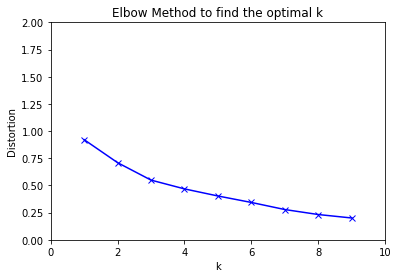

In [44]:
from sklearn import metrics
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

plt.plot()
plt.xlim([0, 10])
plt.ylim([0, 2.0])
plt.title('Dataset')

colors = ['b', 'g', 'r']
markers = ['o', 'v', 's']
# k means determine k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(Cluster_dataSet)
    kmeanModel.fit(Cluster_dataSet)
    distortions.append(sum(np.min(cdist(Cluster_dataSet, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / Cluster_dataSet.shape[0])
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Elbow Method to find the optimal k')
plt.show()


Distoration is starting from around 1.25 when K=1, we know that based on the selected features, the differences between neighborhoods are not as significant as we thought. Meanwhile, when K increases, the centroids are closer to the clusters centroid, the improvement will decline. We can see that there are 2 slight elbow shape points created, which are 3 and 5.In this case, I will be choosing K=3 to avoid the overfitting situation

#### Modeling
Apply K-means on dataset and take look at cluster labels

In [54]:
clusterNum=3
k_means=KMeans(init='k-means++', n_clusters=clusterNum, n_init=12)
k_means.fit(X)
labels=k_means.labels_
print(labels)

[2 2 2 2 2 2 2 2 0 0 0 0 2 0 0 1 1 1 1]


In [55]:
nei_new['Clus_km']=labels
nei_new.head()

,Neighborhood,Price,Food,Shopping,Commute,Workout,Entertain,Lifestyle,Clus_km
0,Briar Hills,1033941.0,7,2,1,4,0,1,2
1,Emerald Vista,880500.0,10,1,0,2,1,2,2
2,Riva & Rainsong,1021929.0,14,4,1,1,1,2,2
3,San Ramon Village,855284.0,4,2,1,4,0,1,2
4,Silvergate Area,1001864.0,5,0,2,3,0,2,2


In [56]:
nei_new['Convenience']=nei_new[['Food','Shopping','Commute']].sum(axis=1, numeric_only=True)
nei_new['Productivity']=nei_new[['Lifestyle','Workout','Entertain']].sum(axis=1, numeric_only=True)
nei_new.head()

,Neighborhood,Price,Food,Shopping,Commute,Workout,Entertain,Lifestyle,Clus_km,Convenience,Productivity
0,Briar Hills,1033941.0,7,2,1,4,0,1,2,10,5
1,Emerald Vista,880500.0,10,1,0,2,1,2,2,11,5
2,Riva & Rainsong,1021929.0,14,4,1,1,1,2,2,19,4
3,San Ramon Village,855284.0,4,2,1,4,0,1,2,7,5
4,Silvergate Area,1001864.0,5,0,2,3,0,2,2,7,5


In [57]:
df_plot=nei_new.set_index('Neighborhood')
df_plot.head()

,Price,Food,Shopping,Commute,Workout,Entertain,Lifestyle,Clus_km,Convenience,Productivity
Neighborhood,,,,,,,,,,
Briar Hills,1033941.0,7,2,1,4,0,1,2,10,5
Emerald Vista,880500.0,10,1,0,2,1,2,2,11,5
Riva & Rainsong,1021929.0,14,4,1,1,1,2,2,19,4
San Ramon Village,855284.0,4,2,1,4,0,1,2,7,5
Silvergate Area,1001864.0,5,0,2,3,0,2,2,7,5


In [58]:
df_map=df_coords[['Neighborhood','Latitude','Longitude']].merge(nei_new[['Neighborhood','Clus_km']], left_on='Neighborhood',right_on='Neighborhood', how='left')
df_map

,Neighborhood,Latitude,Longitude,Clus_km
0,Briar Hills,37.723026,-121.929765,2
1,Emerald Vista,37.713075,-121.924975,2
2,Riva & Rainsong,37.704230,-121.916350,2
3,San Ramon Village,37.721580,-121.928650,2
4,Silvergate Area,37.707241,-121.946475,2
5,Tassajara Meadows,37.730930,-121.871002,2
6,Willow Creek,37.725271,-121.910787,2
7,Boulevard,37.705567,-121.874976,2
8,Dublin Greene,37.710675,-121.940343,0
9,Dublin Ranch Area,37.716998,-121.868342,0


### Visualize the clustering in map

In [60]:
# create map
import matplotlib.colors as colors
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)

# set color scheme for the clusters
x = np.arange(clusterNum)
ys = [i + x + (i*x)**2 for i in range(clusterNum)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df_map['Latitude'], df_map['Longitude'], df_map['Neighborhood'], df_map['Clus_km']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster],
        fill=True,
        fill_color=rainbow[cluster],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [82]:
nei_new.groupby('Clus_km').mean().apply(lambda x: round(x, 1))

,Price,Food,Shopping,Commute,Workout,Entertain,Lifestyle,Convenience,Productivity
Clus_km,,,,,,,,,
0,1223849.7,5.8,1.0,0.3,2.0,0.5,1.3,7.2,3.8
1,1546439.5,1.8,0.2,0.0,1.8,0.2,0.2,2.0,2.2
2,1003076.6,7.2,1.8,0.8,2.2,0.6,1.4,9.8,4.2


In [63]:
nei_new['cluster']=np.where(nei_new.Clus_km==0,'Cluster 0', np.where(nei_new.Clus_km==1,'Cluster 1', 'Cluster 2'))
nei_new

,Neighborhood,Price,Food,Shopping,Commute,Workout,Entertain,Lifestyle,Clus_km,Convenience,Productivity,cluster
0,Briar Hills,1033941.0,7,2,1,4,0,1,2,10,5,Cluster 2
1,Emerald Vista,880500.0,10,1,0,2,1,2,2,11,5,Cluster 2
2,Riva & Rainsong,1021929.0,14,4,1,1,1,2,2,19,4,Cluster 2
3,San Ramon Village,855284.0,4,2,1,4,0,1,2,7,5,Cluster 2
4,Silvergate Area,1001864.0,5,0,2,3,0,2,2,7,5,Cluster 2
5,Tassajara Meadows,1034313.0,0,0,0,0,1,0,2,0,1,Cluster 2
6,Willow Creek,1043500.0,0,0,0,4,0,0,2,0,4,Cluster 2
7,Boulevard,1058512.0,11,3,1,1,1,3,2,15,5,Cluster 2
8,Dublin Greene,1230000.0,7,1,2,3,1,3,0,10,7,Cluster 0
9,Dublin Ranch Area,1298442.0,3,0,0,4,0,1,0,3,5,Cluster 0


### 6. Analyze and recommend the best cluster of neighborhood

Text(0.5, 1.0, 'Neighborhood Counts within each Cluster')

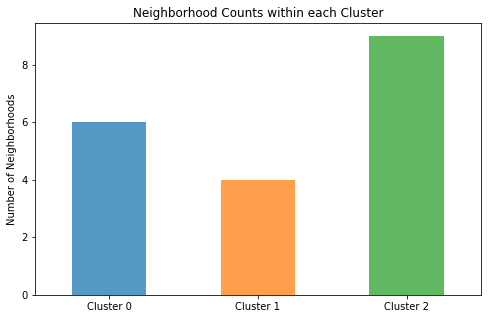

In [64]:
cluster_df=nei_new.groupby('cluster').count().iloc[:,0]
cluster_df.plot(kind='bar',figsize=(8,5),alpha=0.75, rot=0)
plt.xlabel('')
plt.ylabel('Number of Neighborhoods')
plt.title('Neighborhood Counts within each Cluster')

In [65]:
nei_new[nei_new['Clus_km']==0]

,Neighborhood,Price,Food,Shopping,Commute,Workout,Entertain,Lifestyle,Clus_km,Convenience,Productivity,cluster
8,Dublin Greene,1230000.0,7,1,2,3,1,3,0,10,7,Cluster 0
9,Dublin Ranch Area,1298442.0,3,0,0,4,0,1,0,3,5,Cluster 0
10,Emerald Park,1204850.0,10,1,0,2,1,2,0,11,5,Cluster 0
11,Fallon Crossing Area,1229518.0,9,2,0,1,0,1,0,11,2,Cluster 0
13,Jordan Ranch,1174455.0,6,2,0,2,0,1,0,8,3,Cluster 0
14,Wallis Ranch,1205833.0,0,0,0,0,1,0,0,0,1,Cluster 0


In [66]:
nei_new[nei_new['Clus_km']==1]

,Neighborhood,Price,Food,Shopping,Commute,Workout,Entertain,Lifestyle,Clus_km,Convenience,Productivity,cluster
15,Dublin Ranch Golf Club,1610200.0,1,0,0,2,0,0,1,1,2,Cluster 1
16,Positano,1459027.0,6,1,0,2,0,1,1,7,3,Cluster 1
17,Schaefer Ranch,1459574.0,0,0,0,3,0,0,1,0,3,Cluster 1
18,Tassajara Hills,1656957.0,0,0,0,0,1,0,1,0,1,Cluster 1


In [67]:
nei_new[nei_new['Clus_km']==2]

,Neighborhood,Price,Food,Shopping,Commute,Workout,Entertain,Lifestyle,Clus_km,Convenience,Productivity,cluster
0,Briar Hills,1033941.0,7,2,1,4,0,1,2,10,5,Cluster 2
1,Emerald Vista,880500.0,10,1,0,2,1,2,2,11,5,Cluster 2
2,Riva & Rainsong,1021929.0,14,4,1,1,1,2,2,19,4,Cluster 2
3,San Ramon Village,855284.0,4,2,1,4,0,1,2,7,5,Cluster 2
4,Silvergate Area,1001864.0,5,0,2,3,0,2,2,7,5,Cluster 2
5,Tassajara Meadows,1034313.0,0,0,0,0,1,0,2,0,1,Cluster 2
6,Willow Creek,1043500.0,0,0,0,4,0,0,2,0,4,Cluster 2
7,Boulevard,1058512.0,11,3,1,1,1,3,2,15,5,Cluster 2
12,Irongate,1097846.0,14,4,1,1,1,2,2,19,4,Cluster 2


In [68]:
df_plot=nei_new.set_index('Neighborhood')
df_plot.head()

,Price,Food,Shopping,Commute,Workout,Entertain,Lifestyle,Clus_km,Convenience,Productivity,cluster
Neighborhood,,,,,,,,,,,
Briar Hills,1033941.0,7,2,1,4,0,1,2,10,5,Cluster 2
Emerald Vista,880500.0,10,1,0,2,1,2,2,11,5,Cluster 2
Riva & Rainsong,1021929.0,14,4,1,1,1,2,2,19,4,Cluster 2
San Ramon Village,855284.0,4,2,1,4,0,1,2,7,5,Cluster 2
Silvergate Area,1001864.0,5,0,2,3,0,2,2,7,5,Cluster 2


Text(0.5, 1.0, 'Average Housing Price within Neighborhood Clusters')

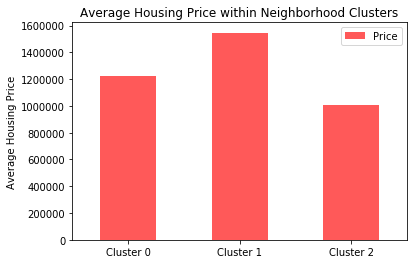

In [69]:
df_plot=df_plot.groupby('cluster').mean().round(1)
df_plot
df_plot[['Price']].plot(kind='bar', alpha=0.65,color='red',rot=0)
plt.xlabel('')
plt.ylabel('Average Housing Price')
plt.title('Average Housing Price within Neighborhood Clusters')

#### look into each neighborhood cluster

Text(0.5, 1.0, 'Convenience Venues within Neighborhood Clusters')

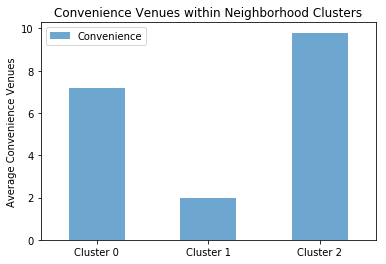

In [70]:
df_plot[['Convenience']].plot(kind='bar', alpha=0.65,rot=0)
plt.xlabel('')
plt.ylabel('Average Convenience Venues')
plt.title('Convenience Venues within Neighborhood Clusters')

Text(0.5, 1.0, 'Productivity Venues within Neighborhood Clusters')

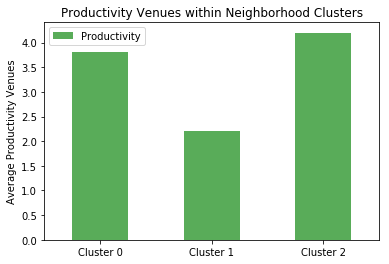

In [71]:
df_plot[['Productivity']].plot(kind='bar', alpha=0.65,color='green',rot=0)
plt.xlabel('')
plt.ylabel('Average Productivity Venues')
plt.title('Productivity Venues within Neighborhood Clusters')

#### __Cluster 0: Medium rent, medium high convenience, and high productivity (6 neighborhoods)__
#### __Cluster 1: High rent, low convenience, and medium productivity (4 neighborhoods)__
####  __Cluster 2: Low rent, high convenience, and medium high productivity  (9 neighborhoods)  _BEST CHOICE!!___



__Observation__:
After the machine learning clustering analysis, 3 clusters have been identified and visualized as above. 3 main characteristics are utilized to distinguish these 3 groups, which are renting cost/average housing price, nearby venues convenience feature, and nearby venues productivity feature. Neighborhoods falling under cluster 1 are the least attractive to future employers as they will be paying higher rent than other local areas, and vicinities are also not as convenient or productive as the other 2 clusters to the employees. Without cluster 2, cluster 0 can be an option since those 6 neighborhoods within cluster 0 are averagingly providing a commuter friendly working environment. However, after cross checking the the other features, especially the rent, I believe that cluster 2 neighborhoods would be the best location for the new companies who are moving to Dublin. 
The average rent price of 9 neighborhoods within cluster 2 is the lowest compared with the other two. Infrastracture and other facilities are being constructed to provide great work life balance for the future employees. I highlighted 3 neighborhoods as the priority business locations, __Emerald Vista, Riva & Rainsong, and San Ramon Village__. Emerald Vista & San Ramon Village are both indicating affordable rent prices and accommodating versatile amenities. R&R can also be a wonderful choice if companies are celebrating diverse communiites with their employees or business partners. 

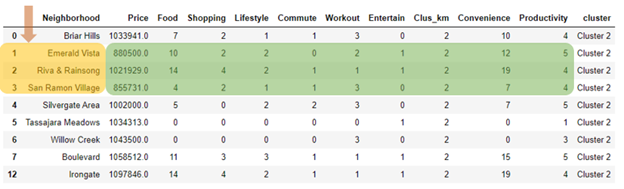
